In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mnist_reader import *

# Gray-scales Samples

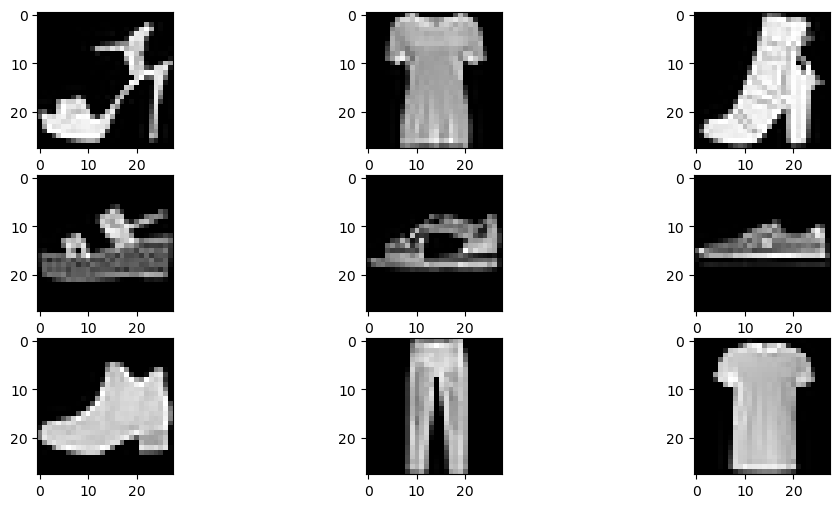

In [2]:
fig = plt.figure(figsize=(12,6))
for i, img in enumerate(get_images(9)):
    plt.subplot(3,3,i+1)
    plt.imshow(img, cmap='gray');
plt.show()

# Binaries Images

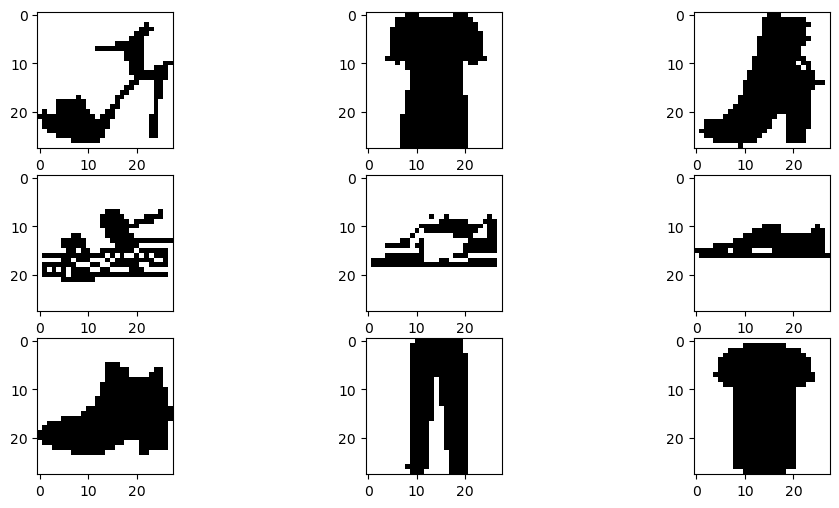

In [3]:
fig = plt.figure(figsize=(12,6))
for i, img in enumerate(get_binary_image(9)):
    plt.subplot(3,3,i+1)
    plt.imshow(img, cmap='gray');
plt.show()

# Memories one image

In [4]:
# Load one image
image = get_binary_image(1)[0]
print(f"Image shape: {image.shape}")
# Turn 2D image into 1D vector
image_1D = image.flatten()
print(f"1D vector shape: {image_1D.shape}")

# Create a weight matrix by memorising the image
W = np.outer(2*image_1D-1, 2*image_1D-1)
# Set the diagonal terms to zero
W = W - np.diag(np.diagonal(W))
print(f"The weight matrix shape: {W.shape}")

Image shape: (28, 28)
1D vector shape: (784,)
The weight matrix shape: (784, 784)


# Mask half of the original image

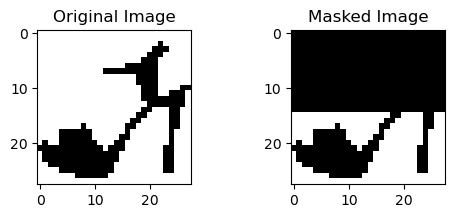

In [5]:
# Copy the original image first
masked_image = image.copy()
# Then, mask the upper half
masked_image[:15, :] = 0
fig = plt.figure(figsize=(6,2))
plt.subplot(121);plt.imshow(image, cmap='gray');plt.title("Original Image")
plt.subplot(122);plt.imshow(masked_image, cmap='gray');plt.title("Masked Image");plt.show()

# Query the masked image to retrieve the original one 
### Paper: [Link](https://www.pnas.org/doi/abs/10.1073/pnas.79.8.2554)
### Algorithm:
#### $if \sum_{i \ne j} W_{ij} V_j > U_i: V_i \rightarrow 1$.
#### $if \sum_{i \ne j} W_{ij} V_j < U_i: V_i \rightarrow 0$.

#### $U_i$ is the node's threshold that we use $U_i = 0$ below.

In [6]:
# 1D masked image
masked_image_1D = masked_image.flatten()
# An empty vector
retrieved_image_1D = np.zeros(masked_image_1D.shape)
for i in range(masked_image_1D.shape[0]):
    # Select the corresponding row in the weight matrix
    t = W[i, :]
    #
    energy = np.dot(t, masked_image_1D)
    if energy > 0:
        retrieved_image_1D[i] = 1
    else:
        retrieved_image_1D[i] = 0
        
retrieved_image = retrieved_image_1D.copy().reshape((28, 28))

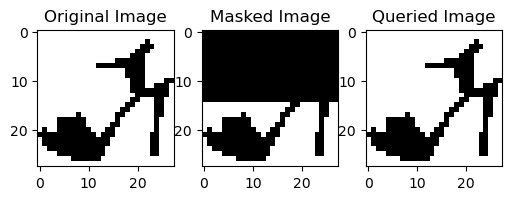

In [7]:
fig = plt.figure(figsize=(6,2))
plt.subplot(131);plt.imshow(image, cmap='gray');plt.title("Original Image")
plt.subplot(132);plt.imshow(masked_image, cmap='gray');plt.title("Masked Image")
plt.subplot(133);plt.imshow(retrieved_image, cmap='gray');plt.title("Queried Image");plt.show()

# Or in matrix notation

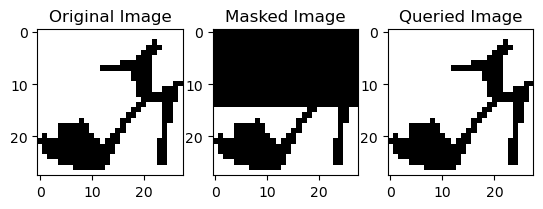

In [8]:
# 1D masked image
masked_image_1D = masked_image.flatten()
# 
energies = np.matmul(W, masked_image_1D)
retrieved_image_1D = np.where(energies > 0, 1, 0 )

plt.subplot(131);plt.imshow(image, cmap='gray');plt.title("Original Image")
plt.subplot(132);plt.imshow(masked_image, cmap='gray');plt.title("Masked Image")
plt.subplot(133);plt.imshow(retrieved_image, cmap='gray');plt.title("Queried Image");plt.show()

# Memories six images

In [19]:
size = 6
# Load six images
images = get_binary_image(size)
print(f"Number of images: {len(images)}, Image shape: {images[0].shape}")
# Turn 2D images into 1D vectors
images_1D = np.array([img.flatten() for img in images])
print(f"The shape of the ndarray of 1D vectors: {images_1D.shape}")

# Create a weight matrix by memorising images
# 1) The outer product of each image
Ws = np.array([np.outer(2*img-1, 2*img-1) for img in images_1D[:]])
print(f"Ws shape: {Ws.shape}")
# sum all of the Ws along the first axis
W = np.sum(Ws, axis=0)
W = W - np.diag(np.diagonal(W))
print(f"The weight matrix shape: {W.shape}")

Number of images: 6, Image shape: (28, 28)
The shape of the ndarray of 1D vectors: (6, 784)
Ws shape: (6, 784, 784)
The weight matrix shape: (784, 784)


# Create some helper functions

In [23]:
def mask_my_image(img, x_slice=slice(0,15), y_slice=slice(0,28)):
    masked_image = img.copy()
    masked_image[x_slice, y_slice] = 0
    return masked_image

def query(img, W):
    # 1D masked image
    masked_image_1D = img.flatten()
    energies = np.matmul(W, masked_image_1D)
    return np.where(energies > 0, 1, 0 ).reshape((28, 28))

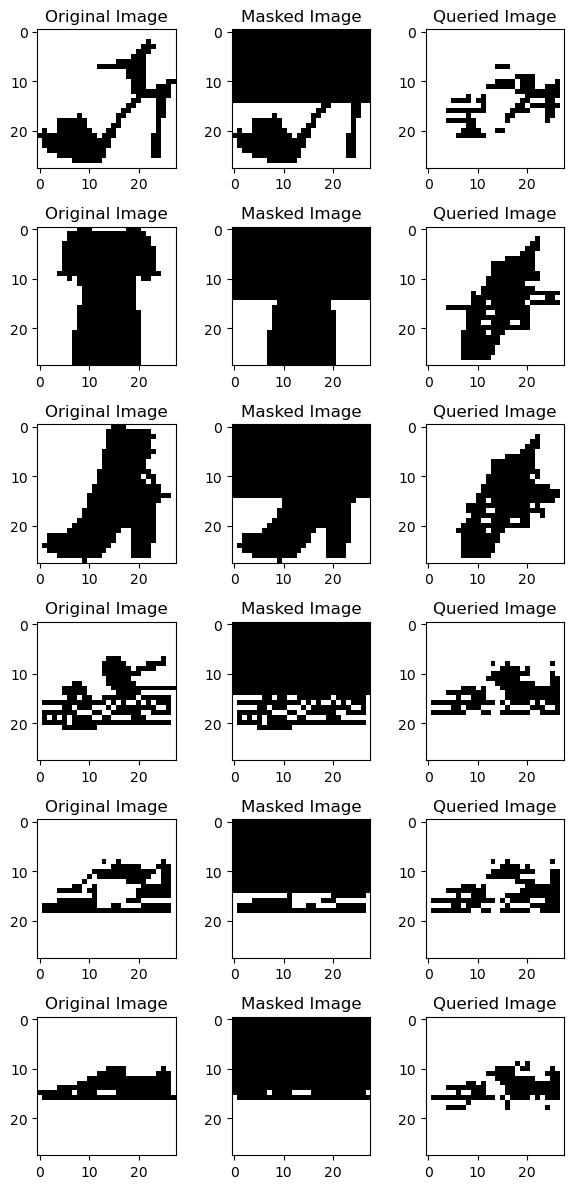

In [34]:

fig = plt.figure(figsize=(6,size*2))
index = 1

for img in get_binary_image(size):
    plt.subplot(size,3,index);plt.title("Original Image")    
    plt.imshow(img, cmap='gray')
    #
    plt.subplot(size,3,index+1);plt.title("Masked Image")        
    masked_img = mask_my_image(img, x_slice=slice(0,15))
    plt.imshow(masked_img, cmap='gray')
    #
    plt.subplot(size,3,index+2);plt.title("Queried Image")    
    retrieved_img = query(masked_img, W)
    plt.imshow(retrieved_img, cmap='gray')
    index += 3

plt.tight_layout();plt.show()